<a href="https://colab.research.google.com/github/PierreBeillon/Projet/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enquete Titanic



But
- demographie des passager
- distribution de l'age
- class et genre des survivant

Data: http://mob.u-strasbg.fr/lab/data/titanic.csv

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Analyse de la bdd

In [6]:
dfo = pd.read_csv("http://mob.u-strasbg.fr/lab/data/titanic.csv")
dfo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Je n'ai pas besoin de certaines colonnes

In [15]:
df = dfo.drop(columns =[ "SibSp",	"Parch",	"Ticket",	"Fare",	"Cabin",	"Embarked" ])
df

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0


Je n'ai pas besoin de 2 indexs des passagers

In [16]:
df.set_index("PassengerId", inplace=True)

In [17]:
df

,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN


In [43]:
age = df.Age
age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
age.min()

0.42

In [25]:
age.max()

80.0

In [27]:
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
age = age.value_counts()
age

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [45]:
age = age.sort_index()
age

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

<Axes: >

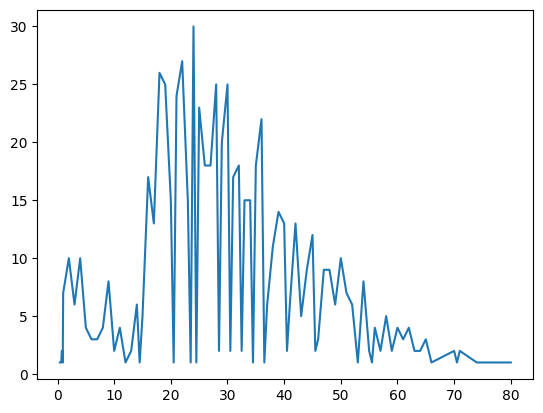

In [48]:
age.plot()

<Axes: title={'center': 'Age distribution'}, xlabel='Age', ylabel='Nombre de passager initial'>

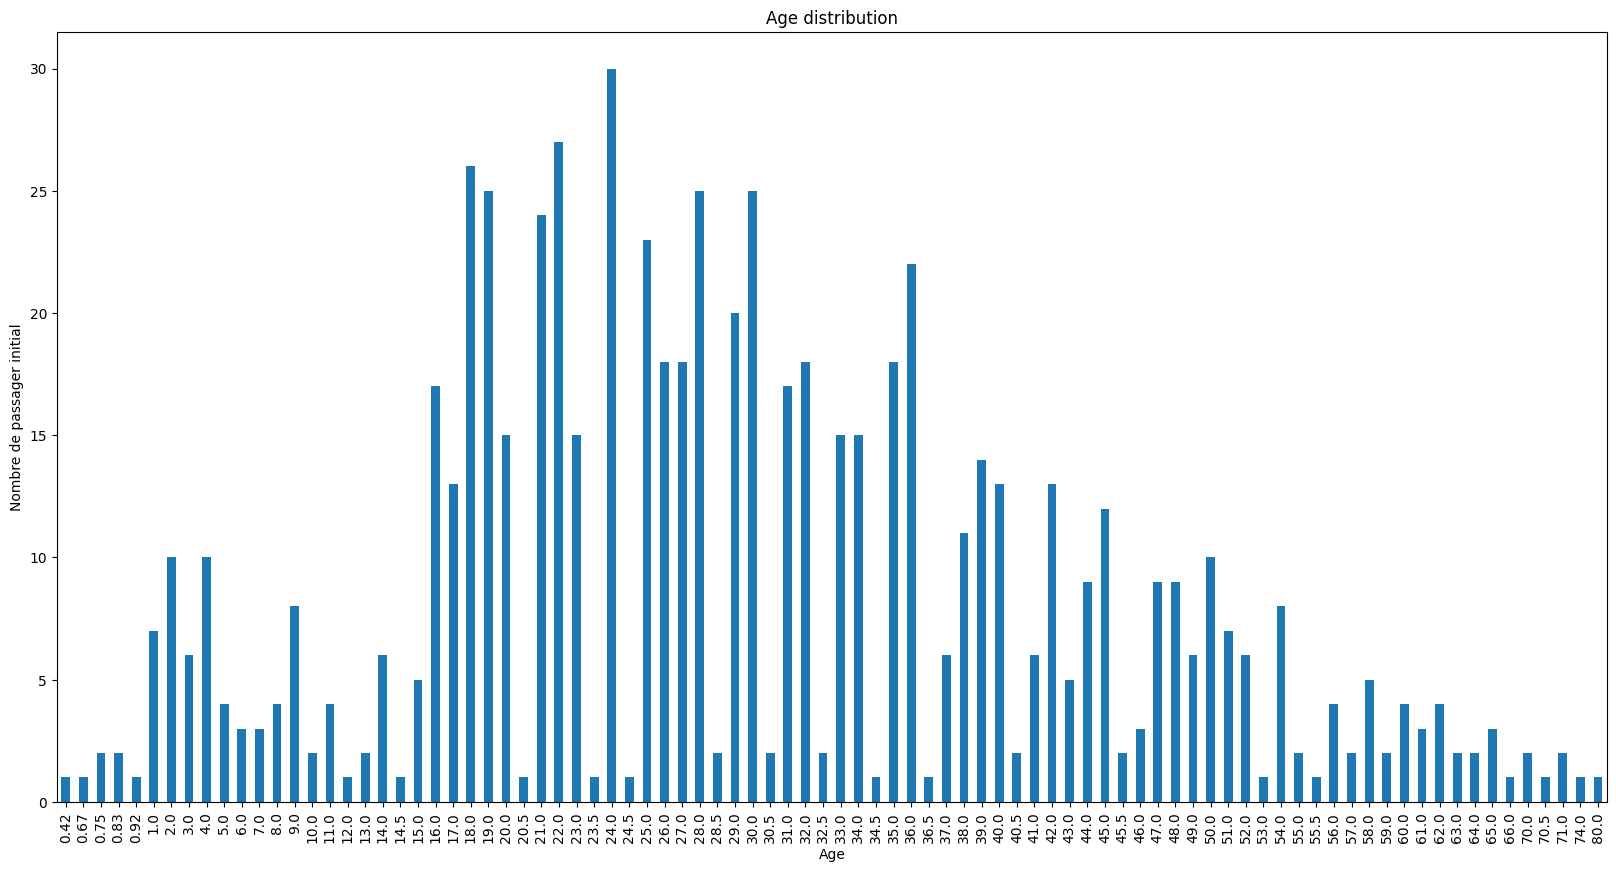

In [52]:
graph = age.plot.bar(figsize = (20,10))
graph.set_title("Age distribution")
graph.set_xlabel("Age")
graph.set_ylabel("Nombre de passager initial")
graph

<Axes: ylabel='Pclass'>

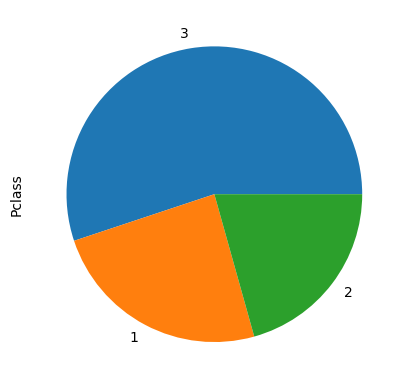

In [58]:
df["Pclass"].value_counts().plot.pie()

In [60]:
df.groupby(["Pclass", "Sex"]).mean()

<ipython-input-60-9ab2b7bae729>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Pclass", "Sex"]).mean()


Survived        Age
Pclass Sex                        
1      female  0.968085  34.611765
       male    0.368852  41.281386
2      female  0.921053  28.722973
       male    0.157407  30.740707
3      female  0.500000  21.750000
       male    0.135447  26.507589

In [61]:
df[df["Age"]<18].groupby(["Pclass", "Sex"]).mean()

<ipython-input-61-a9f2b23dd562>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df["Age"]<18].groupby(["Pclass", "Sex"]).mean()


Survived        Age
Pclass Sex                        
1      female  0.875000  14.125000
       male    1.000000   8.230000
2      female  1.000000   8.333333
       male    0.818182   4.757273
3      female  0.542857   8.428571
       male    0.232558   9.963256

Mise en place sur du ML

<ipython-input-71-6e7a4fe18c50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data = dfo , palette= 'rainbow')


<Axes: xlabel='Survived', ylabel='count'>

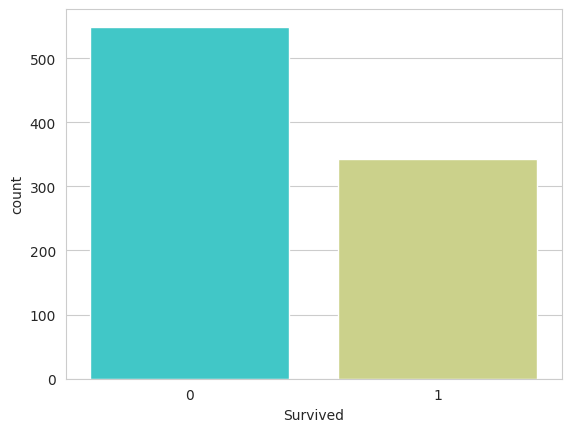

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = dfo , palette= 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

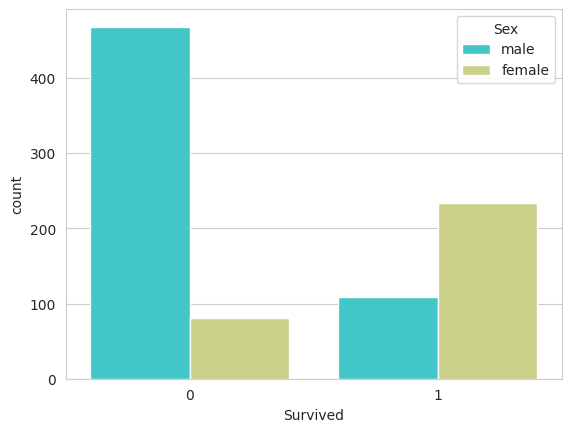

In [73]:
sns.countplot(x='Survived', hue='Sex', data = dfo , palette= 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

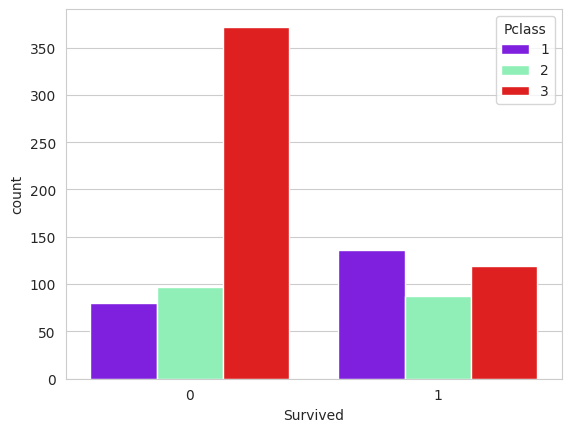

In [74]:
sns.countplot(x='Survived',hue='Pclass', data = dfo , palette= 'rainbow')

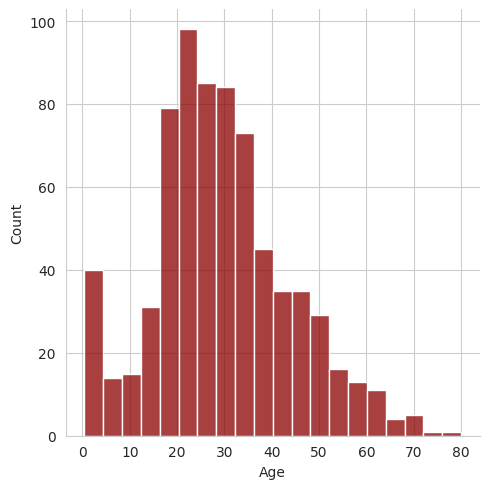

In [82]:
sns.displot(df.Age,kde= False, color='darkred', bins = 20)

Data Cleaning

In [83]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

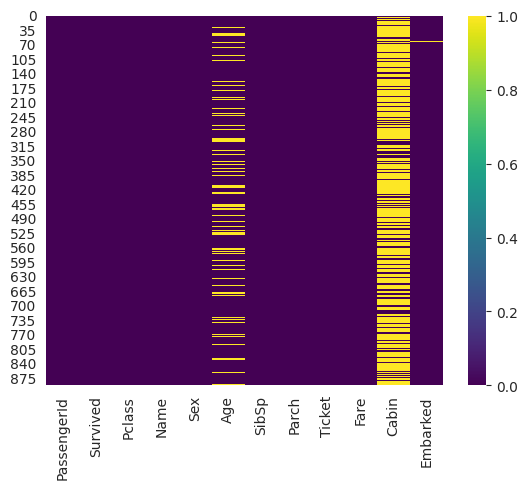

In [93]:
sns.heatmap(dfo.isnull(), cmap = 'viridis')

Tout d'abord, remplaçons les ages null par l'age moyen de la classe de la personne

<ipython-input-92-d456c479d8b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=dfo,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

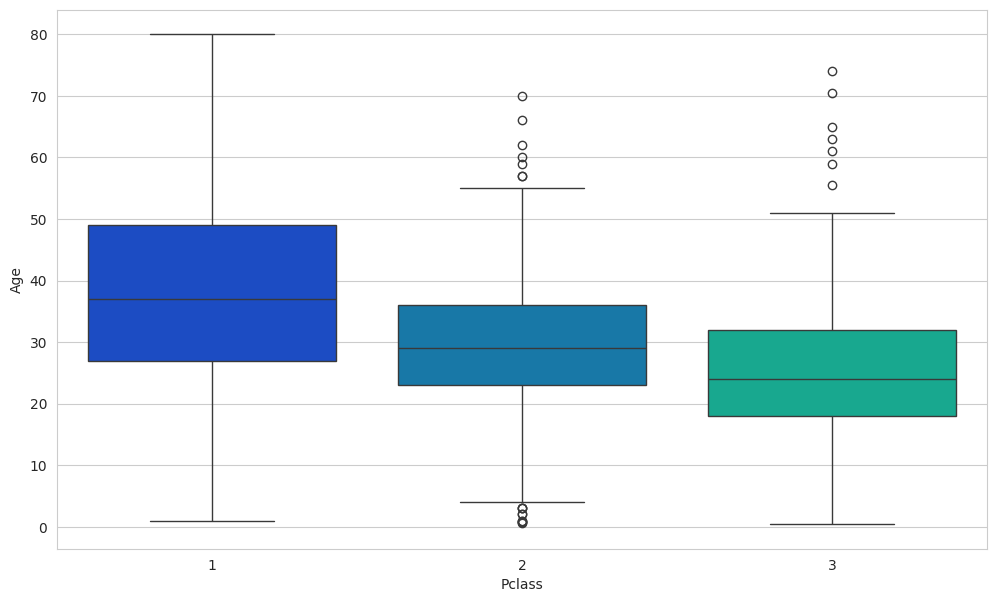

In [92]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=dfo,palette='winter')

In [91]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24
  else:
    return Age

In [94]:
dfo["Age"] = dfo[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

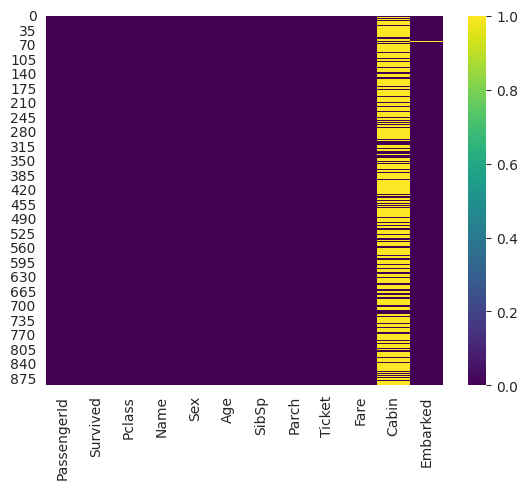

In [95]:
sns.heatmap(dfo.isnull(), cmap = 'viridis')

A présent, on supprime la colonne Cabin car elle est inexploitable

In [96]:
dfo.drop("Cabin", axis = 1, inplace=True)

In [97]:
dfo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

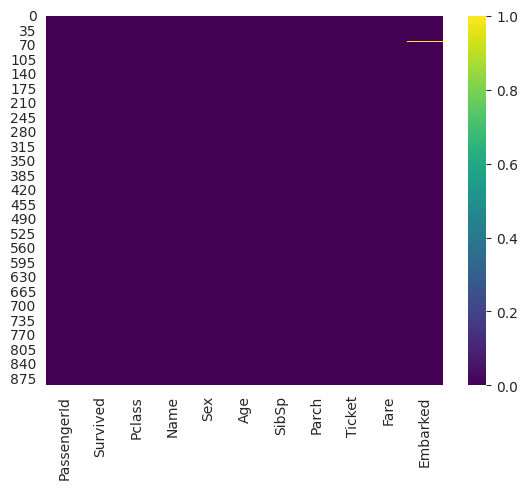

In [98]:
sns.heatmap(dfo.isnull(), cmap = 'viridis')

In [99]:
dfo.dropna(inplace=True)

<Axes: >

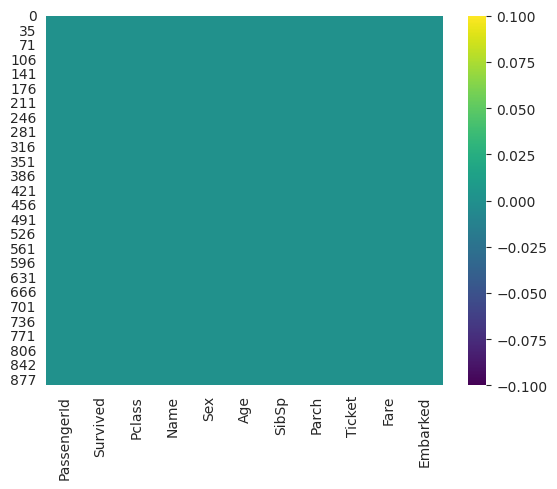

In [100]:
sns.heatmap(dfo.isnull(), cmap = 'viridis')

In [102]:
sex = pd.get_dummies(dfo['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [104]:
embark = pd.get_dummies(dfo['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [106]:
dfo.drop(['Sex', 'Embarked','Name', 'Ticket'], axis=1, inplace=True)

KeyError: "['Sex', 'Embarked', 'Name', 'Ticket'] not found in axis"

In [107]:
dfo

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [108]:
dfo = pd.concat([dfo,sex,embark],axis=1)

In [109]:
dfo

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


Maintenant la data est préte pour le model.
Utilisons Sklearn.

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfo.drop('Survived', axis= 1),
                                                    dfo['Survived'], test_size= 0.30,
                                                    random_state=101)

In [119]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
807          808       3  18.0      0      0   7.7750     0  0  1
651          652       2  18.0      0      1  23.0000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
690          691       1  31.0      1      0  57.0000     1  0  1
196          197       3  24.0      0      0   7.7500     1  1  0
..           ...     ...   ...    ...    ...      ...   ... .. ..
576          577       2  34.0      0      0  13.0000     0  0  1
840          841       3  20.0      0      0   7.9250     1  0  1
338          339       3  45.0      0      0   8.0500     1  0  1
524          525       3  24.0      0      0   7.2292     1  0  0
865          866       2  42.0      0      0  13.0000     0  0  1

[622 rows x 9 columns]


In [120]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression(solver='liblinear')

In [121]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [122]:
predictions = logmodel.predict(X_test)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [126]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test,predictions))
tn,fp,fn,tp = confusion_matrix(y_test,predictions).ravel()
print(tn,fp,fn,tp)

Confusion matrix:
 [[151  12]
 [ 36  68]]
151 12 36 68


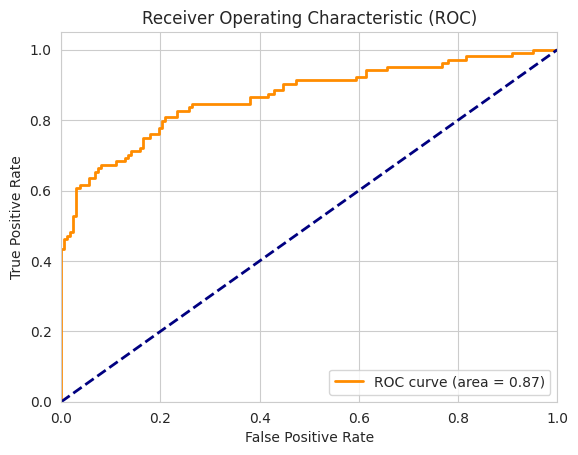

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les scores de prédiction
y_scores = logmodel.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [138]:
data = [[182, 1, 28.0,0,0,75,0,0,1]]
dfp=pd.DataFrame(data,columns=['PassengerId','Pclass','Age','SibSp','Parch', 'Fare','male', 'Q', 'S'])
logmodel.predict(dfp)

array([1])